In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Iraq_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1991,NaN,NaN,4,41.05,87990
1,1992,NaN,NaN,4,42.23,115000
2,1993,NaN,NaN,4,43.49,109066
3,1994,NaN,NaN,4,44.83,119581
4,1995,NaN,NaN,6,46.23,116722


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,26.000000,9.000000,14.000000,26.000000,26.000000,26.000000
mean,2003.500000,3.363333,4096.714286,6.615385,60.593077,112251.076923
std,7.648529,0.111359,2044.329171,2.155494,13.360795,74948.670716
min,1991.000000,3.192000,609.000000,4.000000,41.050000,34655.000000
25%,1997.250000,3.296000,2513.500000,5.000000,49.590000,46220.000000
50%,2003.500000,3.370000,4473.000000,6.000000,59.390000,106549.000000
75%,2009.750000,3.406000,5604.000000,8.000000,70.555000,128053.250000
max,2016.000000,3.570000,7021.000000,11.000000,85.700000,277701.000000


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)
df['GDP'].fillna(mean(df.GDP),inplace=True)


In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

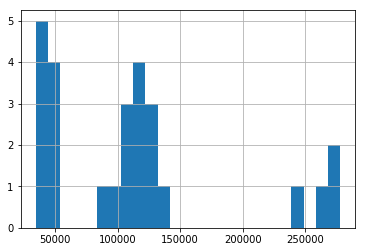

In [7]:
#check population histogram
df['Population'].hist(bins=25)

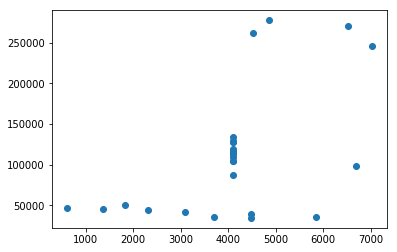

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

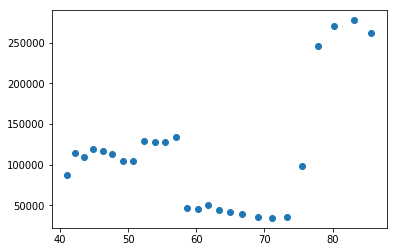

In [9]:
#check relationship between Density and Population
import matplotlib.pyplot as plt
plt.scatter(df['Density'], df['Population'])
plt.show() 

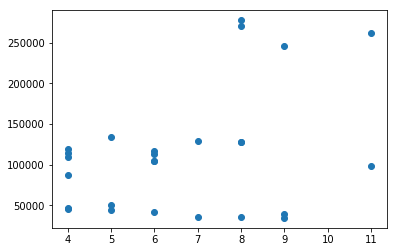

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

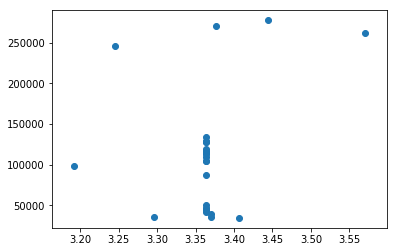

In [11]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [12]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -1898.80899413
Coefficient:  [ 27.86376544]
R squared value:  0.300370125941


In [13]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -16484.4251738
Coefficient:  [ 2124.59093735]
R squared value:  0.143445658335


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  24806.4039735
Coefficient:  [ 13218.3807947]
R squared value:  0.144518097186


In [15]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -1032348.87487
Coefficient:  [ 340317.1313563]
R squared value:  0.0818158948431


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  61737.8029651
MAE Score:  44582.1931668
MSE Score:  3811556314.96
R squared value:  0.573734908195


In [17]:
# include 3 variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  70289.3250463
MAE Score:  43080.7732551
MSE Score:  4940589215.46
R squared value:  0.326583759647


In [18]:
# include all variables to build a model
X = df[['GDP', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  69991.5109162
MAE Score:  48293.3604666
MSE Score:  4898811600.33
R squared value:  0.312083307599


In [19]:
# include all variables to build a model
X = df[['No of country', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  73018.6946511
MAE Score:  65240.1878909
MSE Score:  5331729768.56
R squared value:  0.15709608284


In [20]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.108551501006
Predicted GDP for year:  2017 [[ 5078.16380495]]
Predicted GDP for year:  2018 [[ 5150.9060783]]
Predicted GDP for year:  2019 [[ 5223.64835165]]
Predicted GDP for year:  2020 [[ 5296.390625]]
Predicted GDP for year:  2021 [[ 5369.13289835]]
Predicted GDP for year:  2022 [[ 5441.8751717]]


array([[ 5005.42153159]])

In [21]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.989160262614
Predicted Density for year:  2017 [[ 84.40685926]]
Predicted Density for year:  2018 [[ 86.16062974]]
Predicted Density for year:  2019 [[ 87.91440022]]
Predicted Density for year:  2020 [[ 89.66817071]]
Predicted Density for year:  2021 [[ 91.42194119]]
Predicted Density for year:  2022 [[ 93.17571168]]


array([[ 82.65308877]])

In [22]:
#predict the No of Country for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.528769085151
Predicted No of country for year:  2017 [[ 9.36098886]]
Predicted No of country for year:  2018 [[ 9.56044573]]
Predicted No of country for year:  2019 [[ 9.75990261]]
Predicted No of country for year:  2020 [[ 9.95935949]]
Predicted No of country for year:  2021 [[ 10.15881637]]
Predicted No of country for year:  2022 [[ 10.35827325]]


array([[ 9.16153198]])

In [23]:
# Forecasted Population of Lebanon
X = df[['GDP','Density','No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
    

    
var_2017 = [[5078.16380495,84.40685926,9.36098886]]
var_2018 = [[5150.9060783,86.16062974,9.56044573]]
var_2019 = [[5223.64835165,87.91440022,9.75990261]]                               
var_2020 = [[5296.390625,89.66817071,9.95935949]]
var_2021 = [[5369.13289835,91.42194119,10.15881637]]
var_2022 = [[5441.8751717,93.17571168,10.35827325]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 187246.13164756]
Predicted Population for year 2018:  [ 192178.5109465]
Predicted Population for year 2019:  [ 197110.89014852]
Predicted Population for year 2020:  [ 202043.26937583]
Predicted Population for year 2021:  [ 206975.64857785]
Predicted Population for year 2022:  [ 211908.02780517]


In [24]:
lm2.predict([[5005.42153159,82.65308877,9.16153198]])

array([ 182313.75241991])